In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

working_dir = ""
file_name = "asoiaf-all-edges.csv"
df = pd.read_csv(working_dir+file_name)
df.head()

,Source,Target,Type,id,weight
0,Addam-Marbrand,Brynden-Tully,Undirected,0,3
1,Addam-Marbrand,Cersei-Lannister,Undirected,1,3
2,Addam-Marbrand,Gyles-Rosby,Undirected,2,3
3,Addam-Marbrand,Jaime-Lannister,Undirected,3,14
4,Addam-Marbrand,Jalabhar-Xho,Undirected,4,3


# Drop the Features not required

In [2]:
df.drop(["Type","id"], axis = 1,inplace = True)

In [3]:
df.head()

,Source,Target,weight
0,Addam-Marbrand,Brynden-Tully,3
1,Addam-Marbrand,Cersei-Lannister,3
2,Addam-Marbrand,Gyles-Rosby,3
3,Addam-Marbrand,Jaime-Lannister,14
4,Addam-Marbrand,Jalabhar-Xho,3


In [4]:
g2=nx.from_pandas_edgelist(df,source='Source',target='Target', edge_attr = "weight")
print(g2)

# Representing the Dataset in an Adjacency Matrix would make the tasks and analysis much easier.

# Extracting all the unique values of Source and Target to represent them as rows and columns (i, j)th positional values to input the df["Weight"] value as the elemnet in the Adjacency matrix.

In [5]:
s = list(df["Source"].unique())
t = list(df["Target"].unique())

In [6]:
print("Size of the Source nodes -->", len(s))
print("Size of the Target nodes -->", len(t))
nodes = s + t

Size of the Source nodes --> 577
Size of the Target nodes --> 611


# Create an empty Adjacency Matrix of dimension (S, T) .

In [7]:
def create_adjacency_matrix(n_size):
  return np.zeros((n_size, n_size))

adj_mat = create_adjacency_matrix(len(nodes))
print("The Adjacency matrix is of the shape -->", adj_mat.shape)

The Adjacency matrix is of the shape --> (1188, 1188)


In [8]:
import time
start = time.time()
for i in range(adj_mat.shape[0]):
    node_i = df[df["Source"]==nodes[i]]
    for j in range(adj_mat.shape[0]): 
        if nodes[j] in np.array(node_i["Target"]):
            adj_mat[i][j] = node_i[node_i["Target"]==nodes[j]]["weight"]
        else:
            adj_mat[i][j] = 0
print("Time taken to construct the adjacency matrix --> {} seconds".format(time.time() - start))

Time taken to construct the adjacency matrix --> 61.05734467506409 seconds


# The Adjacency matrix Representation.

In [9]:
adj_mat = np.array(adj_mat, dtype = np.int64)
print(adj_mat)
print("Sum of all weights of the adjacency matrix --> ", adj_mat.sum())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Sum of all weights of the adjacency matrix -->  116168


# QUESTION 1


In [10]:
def visualize_graph(adj_mat):
  graph_object = nx.DiGraph() # Construct a graph object for the directional graph that we are going to form in this function.
  for i in range(adj_mat.shape[0]):
    for j in range(adj_mat.shape[1]):
      if adj_mat[i][j] > 0: # Taking into consideration only the edges where there is a non-zero "weight" value between the source and destination node in the Adjacency matrix.
        graph_object.add_edge(i, j) # Edge creation between "ith" row node and "jth" column node of the adjacency matrix.
  nx.Graph(graph_object, with_labels = True)
  plt.figure(figsize=(15, 15))
  nx.draw(graph_object, style = "solid")
  plt.show() 

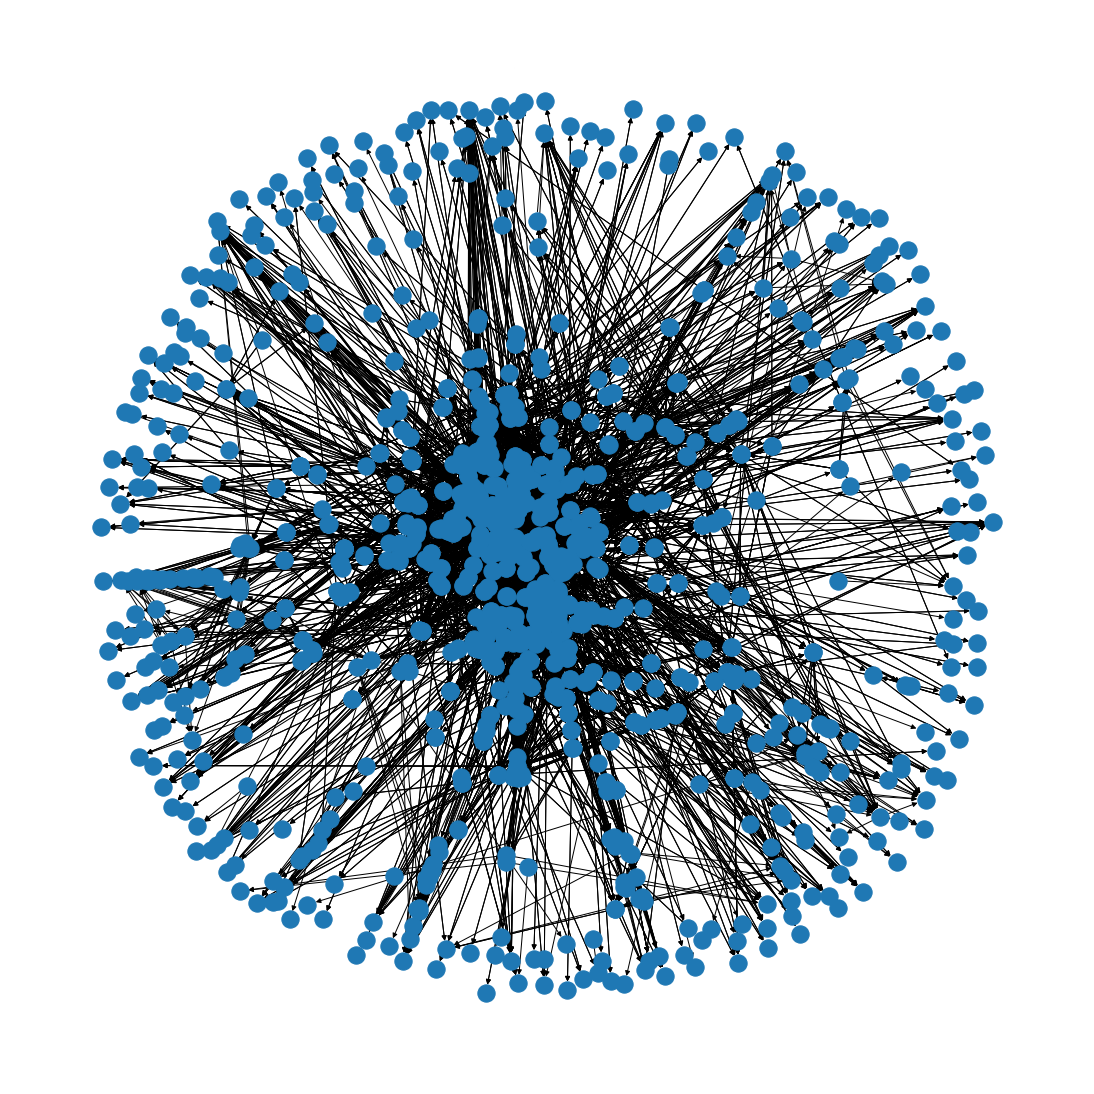

In [11]:
visualize_graph(adj_mat)
plt.show()

# QUESTION 2.


# 1. Since the Adjacency matrix formed is a weighted matrix, the elements in the matrix are "weights" between the source and the destination nodes.
# 2. Since the Adjacency matrix contains the "Weights" of all the edges / connections. We can sum the row / column across the adjacency matrix for all nodes in the matrix. This will help us know the "importance" of each node.
# 3. The node with the highest "Weight" will be the most important node of the network.

In [12]:
#Summing across each row (Hence, summing across each node, where a single node is in "ith" position) -->
sum_each_row = adj_mat.sum(axis = 1)

# Get the highest weight value.
# Get the position of the node with the highest weight.

## The "Weight" associated with the 112th node is 3978.0

In [13]:
max_weight = max(sum_each_row)
print(max_weight)

3978


In [14]:
position_max_weight = np.argmax(sum_each_row)
print(position_max_weight)

112


In [15]:
cersei_lannister = nodes[112]
print("The most important Character is --> ", cersei_lannister)

The most important Character is -->  Cersei-Lannister


# CERSEI-LANNISTER IS THE MOST IMPORTANT CHARACTER BECAUSE --> THE WEIGHT ACROSS THE ROW OF CERSEI-LANNISTER'S NODE IN THE ADJACENCY MATRIX CAME OUT TO BE THE HIGHEST.

# QUESTION 3 


In [16]:
import sys

def dijkstras_algorithm(adj_mat):
  distance = [sys.maxsize] * len(g2.nodes)
  # The distance of the 1st node or the source node from itself will be zero "0".
  distance[0] = 0
  visited_nodes = [False]*len(g2.nodes)

  for each in range(len(g2.nodes)):
    i = calc_minimum_distance(distance, visited_nodes, adj_mat)
    visited_nodes[i] = True

    for j in range(len(g2.nodes)):
      if adj_mat[i][j] > 0 and visited_nodes[j] == False:
        if distance[j] > distance[i] + adj_mat[i][j]:
          distance[j] = distance[i] + adj_mat[i][j]
  return distance

In [17]:
def calc_minimum_distance(distance, visited_nodes, adj_mat):
  minimum_distance_index = 0
  minimum_distance = sys.maxsize # Setting a high value

  for i in range(len(g2.nodes)):
    if distance[i] < minimum_distance and visited_nodes[i] == False:
      minimum_distance = distance[i]
      minimum_distance_index = i
  
  return minimum_distance_index

In [ ]:
distance_list = dijkstras_algorithm(adj_mat)

In [ ]:
for i in range(len(g2.nodes)):
  print("The shortest possible path existing between the Source node {} and {} is --->>> {}".format(int(0), i, distance_list[i]))

In [ ]:
print('Index value of \'Ysilla\' is --> ', nodes.index('Ysilla'))
print('Index value of \'Addam-Marbrand\' is --> ', nodes.index("Addam-Marbrand"))

In [ ]:
print("The shortest path between the nodes \'Addam-Marbrand\' and \'Ysilla is\'", distance_list[612])

# QUESTION 4 


In [ ]:
import sys 

class Graph():

    def __init__(self, vertices):
        self.V = vertices
        self.graph = [[0 for column in range(vertices)] for row in range(vertices)]

    # A utility function to print the constructed MST stored in parent[]
    def printMST(self, parent):
        
        print("Edge \tWeight")
        for i in range(1, self.V):
            print(parent[i], "-", i, "\t", self.graph[i][ parent[i] ])

    # A utility function to find the vertex with minimum distance value, from the set of vertices not yet included in shortest path tree
    def minKey(self, key, mstSet):

        # Initialize min value
        min = sys.maxsize
        min_index = 0
        for v in range(self.V):
            if key[v] < min and mstSet[v] == False:
                min = key[v]
                min_index = v

        return min_index

    # Function to construct and print MST for a graph represented using adjacency matrix representation
    def primMST(self):

        # Key values used to pick minimum weight edge in cut
        key = [sys.maxsize] * self.V
        parent = [None] * self.V # Array to store constructed MST
        # Make key 0 so that this vertex is picked as first vertex
        key[0] = 0
        mstSet = [False] * self.V

        parent[0] = -1 # First node is always the root of

        for cout in range(self.V):

            # Pick the minimum distance vertex from the set of vertices not yet processed. u is always equal to src in first iteration
            u = self.minKey(key, mstSet)

            # Put the minimum distance vertex in the shortest path tree
            mstSet[u] = True

            # Update dist value of the adjacent vertices of the picked vertex only if the current distance is greater than new distance and
            # the vertex in not in the shortest path tree
            for v in range(self.V):

                # graph[u][v] is non zero only for adjacent vertices of m mstSet[v] is false for vertices not yet included in MST
                # Update the key only if graph[u][v] is smaller than key[v]
                if self.graph[u][v] > 0 and mstSet[v] == False and key[v] > self.graph[u][v]:
                        key[v] = self.graph[u][v]
                        parent[v] = u

        self.printMST(parent)
        print("\nParent of vertices are\n")
        print(parent)

In [ ]:
g = Graph(796)
g.graph = adj_mat

g.primMST() 